In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
%matplotlib inline
import seaborn as sns


In [3]:
data=pd.read_csv('C:\\Users\\DELL\\Desktop\\Practice\\data\\house_prices.csv')

In [5]:
data.head()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,yes,East
1,2,114200,2030,4,2,3,yes,East
2,3,114800,1740,3,2,1,yes,East
3,4,94700,1980,3,2,3,yes,East
4,5,119800,2130,3,3,3,yes,East


In [6]:
#df=pd.read_csv("house_prices.csv")

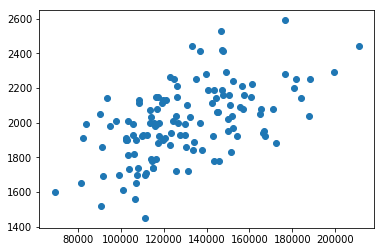

In [8]:
plt.scatter(data.Price,data.SqFt)

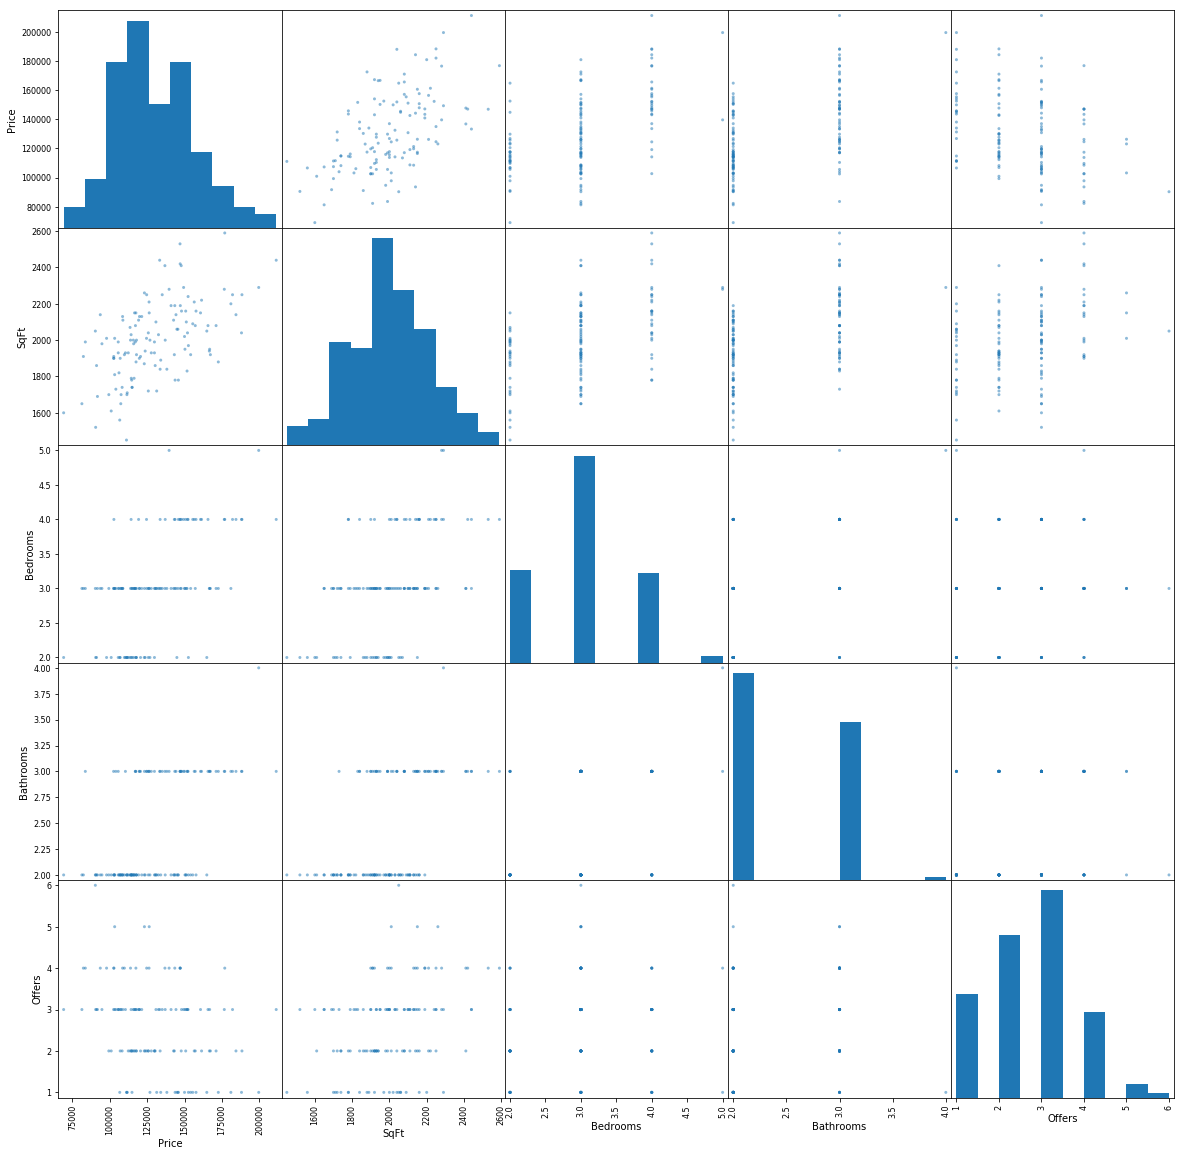

In [20]:
from pandas.plotting import scatter_matrix
scatter_matrix(data, figsize=(20,20))
plt.show()

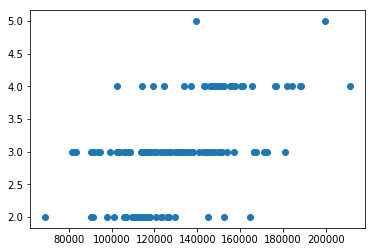

In [12]:
plt.scatter(data.Price,data.Bedrooms)

In [13]:
data.drop('Home',inplace=True, axis=1)

In [15]:
data.head(3)

,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,114300,1790,2,2,2,yes,East
1,114200,2030,4,2,3,yes,East
2,114800,1740,3,2,1,yes,East


In [16]:
corr=data.corr()

In [17]:
print(corr)

              Price      SqFt  Bedrooms  Bathrooms    Offers
Price      1.000000  0.552982  0.525926   0.523258 -0.313636
SqFt       0.552982  1.000000  0.483807   0.522745  0.336923
Bedrooms   0.525926  0.483807  1.000000   0.414556  0.114271
Bathrooms  0.523258  0.522745  0.414556   1.000000  0.143793
Offers    -0.313636  0.336923  0.114271   0.143793  1.000000


Price           0
SqFt            0
Bedrooms        0
Bathrooms       0
Offers          0
Brick           0
Neighborhood    0
dtype: int64

In [ ]:
#only price and squarefeet are in a linear relationship
#so perform a linear regession with x=sqft and y=price

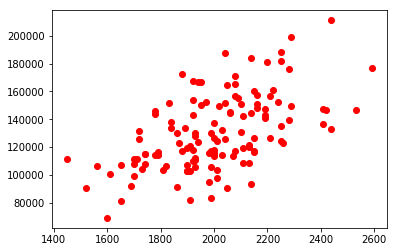

In [22]:
plt.scatter(data.SqFt, data.Price, color='red')

In [26]:
reg=linear_model.LinearRegression()
reg.fit(data[['SqFt']],data.Price)
reg.predict(5000)

array([341040.4613053])

In [8]:
data1=pd.read_csv('C:\\Users\\DELL\\Desktop\\Practice\\data\\house_prices.csv')
data1.isnull().sum()



Home            0
Price           0
SqFt            0
Bedrooms        0
Bathrooms       0
Offers          0
Brick           0
Neighborhood    0
dtype: int64

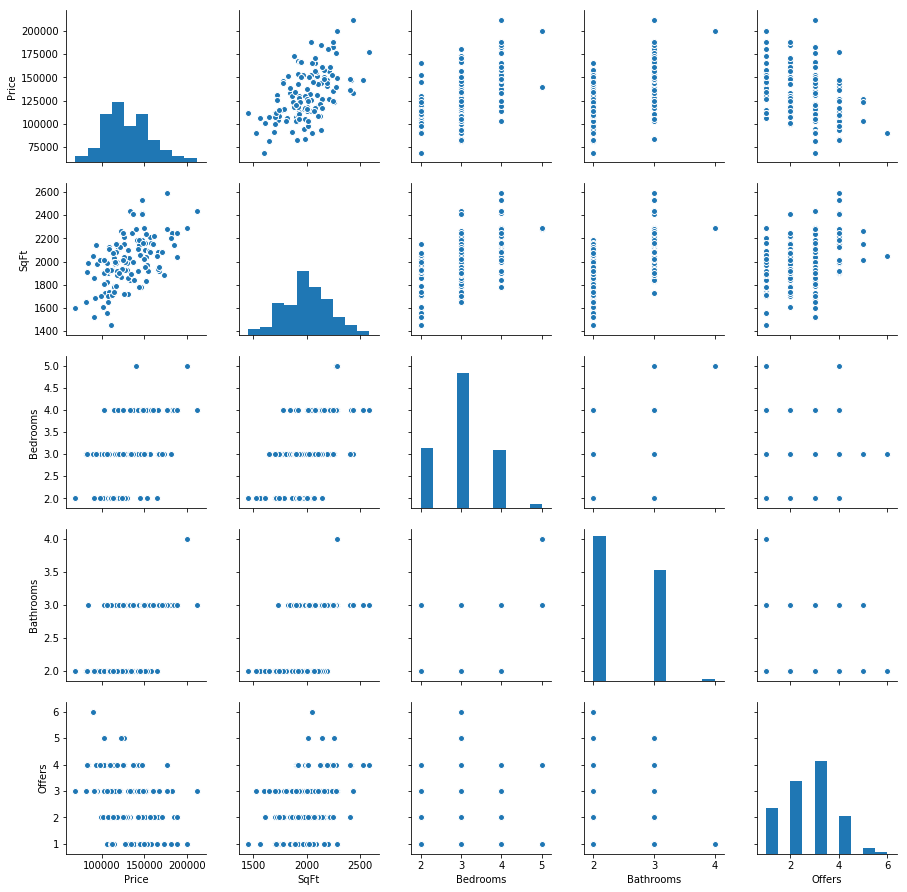

In [9]:
sns.pairplot(data1[['Price','SqFt','Bedrooms','Bathrooms','Offers','Brick','Neighborhood']])

In [10]:
data1.drop('Home',inplace=True, axis=1)

In [11]:
data1.head()

,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,114300,1790,2,2,2,yes,East
1,114200,2030,4,2,3,yes,East
2,114800,1740,3,2,1,yes,East
3,94700,1980,3,2,3,yes,East
4,119800,2130,3,3,3,yes,East


In [12]:
dummiesB=pd.get_dummies(data1.Brick)
dummiesN=pd.get_dummies(data1.Neighborhood)

In [13]:
dfn=pd.concat([data1,dummiesB,dummiesN], axis='columns')

In [14]:
dfn.head(3)

,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood,no,yes,East,North,West
0,114300,1790,2,2,2,yes,East,0,1,1,0,0
1,114200,2030,4,2,3,yes,East,0,1,1,0,0
2,114800,1740,3,2,1,yes,East,0,1,1,0,0


In [15]:
dfn.drop(['Brick','Neighborhood'], inplace=True, axis=1)

In [16]:
dfn.columns

Index(['Price', 'SqFt', 'Bedrooms', 'Bathrooms', 'Offers', 'no', 'yes', 'East',
       'North', 'West'],
      dtype='object')

In [17]:
X=dfn[['SqFt', 'Bedrooms', 'Bathrooms', 'Offers', 'no', 'yes', 'East','North', 'West']]
Y=dfn['Price']

In [18]:
import statsmodels.api as sm
from sklearn import linear_model

In [19]:
model=sm.OLS(Y,X)
results=model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     113.3
Date:                Sun, 14 Jul 2019   Prob (F-statistic):           8.25e-50
Time:                        12:36:56   Log-Likelihood:                -1356.7
No. Observations:                 128   AIC:                             2729.
Df Residuals:                     120   BIC:                             2752.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
SqFt          52.9937      5.734      9.242      0.0

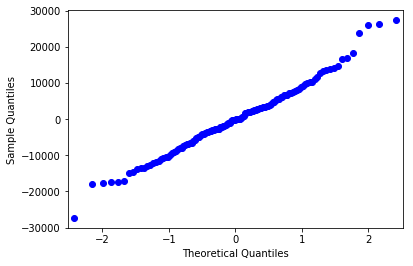

In [26]:
#check if errors folow normal dist
import statsmodels.api as sm
res=results.resid
fig = sm.qqplot(res)
plt.show()

In [28]:
corr=X.corr()
print(corr)

               SqFt  Bedrooms  Bathrooms    Offers        no       yes  \
SqFt       1.000000  0.483807   0.522745  0.336923  0.079792 -0.079792   
Bedrooms   0.483807  1.000000   0.414556  0.114271  0.046380 -0.046380   
Bathrooms  0.522745  0.414556   1.000000  0.143793  0.171977 -0.171977   
Offers     0.336923  0.114271   0.143793  1.000000 -0.144986  0.144986   
no         0.079792  0.046380   0.171977 -0.144986  1.000000 -1.000000   
yes       -0.079792 -0.046380  -0.171977  0.144986 -1.000000  1.000000   
East       0.045639 -0.091750  -0.001247 -0.015602  0.147564 -0.147564   
North     -0.288886 -0.364667  -0.275830  0.332987 -0.260554  0.260554   
West       0.250759  0.471477   0.285923 -0.327425  0.115793 -0.115793   

               East     North      West  
SqFt       0.045639 -0.288886  0.250759  
Bedrooms  -0.091750 -0.364667  0.471477  
Bathrooms -0.001247 -0.275830  0.285923  
Offers    -0.015602  0.332987 -0.327425  
no         0.147564 -0.260554  0.115793  
yes    

In [31]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name=['Lagrange multiplier statistic','p-value','f-value','fp-value']
test=sms.het_breushpagan(results.resid,results.model.exog)
lzip(name,test)

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `het_breushpagan` is deprecated, use `het_breuschpagan` instead!
Use het_breuschpagan, het_breushpagan will be removed in 0.9 
(Note: misspelling missing 'c')
  after removing the cwd from sys.path.


[('Lagrange multiplier statistic', 5.843350767970321),
 ('p-value', 0.6647738192181326),
 ('f-value', 0.8200268104984538),
 ('fp-value', 0.5724671531997805)]

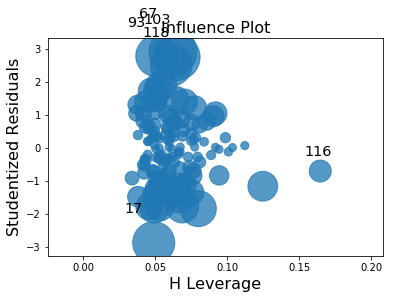

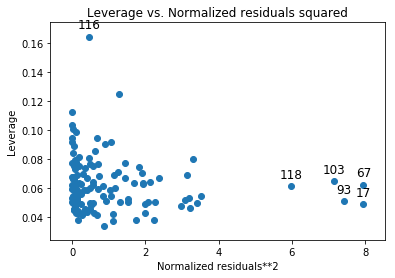

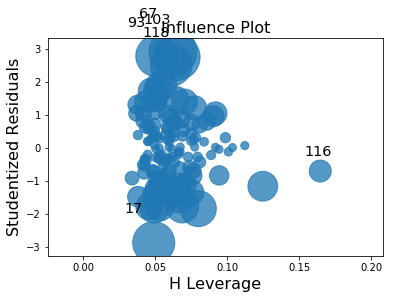

In [32]:
from statsmodels.graphics.regressionplots import *
plot_leverage_resid2(results)
influence_plot(results)
